In [667]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
from scipy import optimize
import inspect
import h5py

In [668]:
%matplotlib notebook

In [669]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

In [695]:
fname_4 = r'/data/new_trap/20190711/Bead3/Discharge/Discharge_3.h5'
bd_4 = BeadDataFile.BeadDataFile(fname_4)
freq,psd = bd_4.psd2('z')
peak_response = bd_4.response_at_freq2('z', drive_freq = 23,bandwidth = 1)

<IPython.core.display.Javascript object>


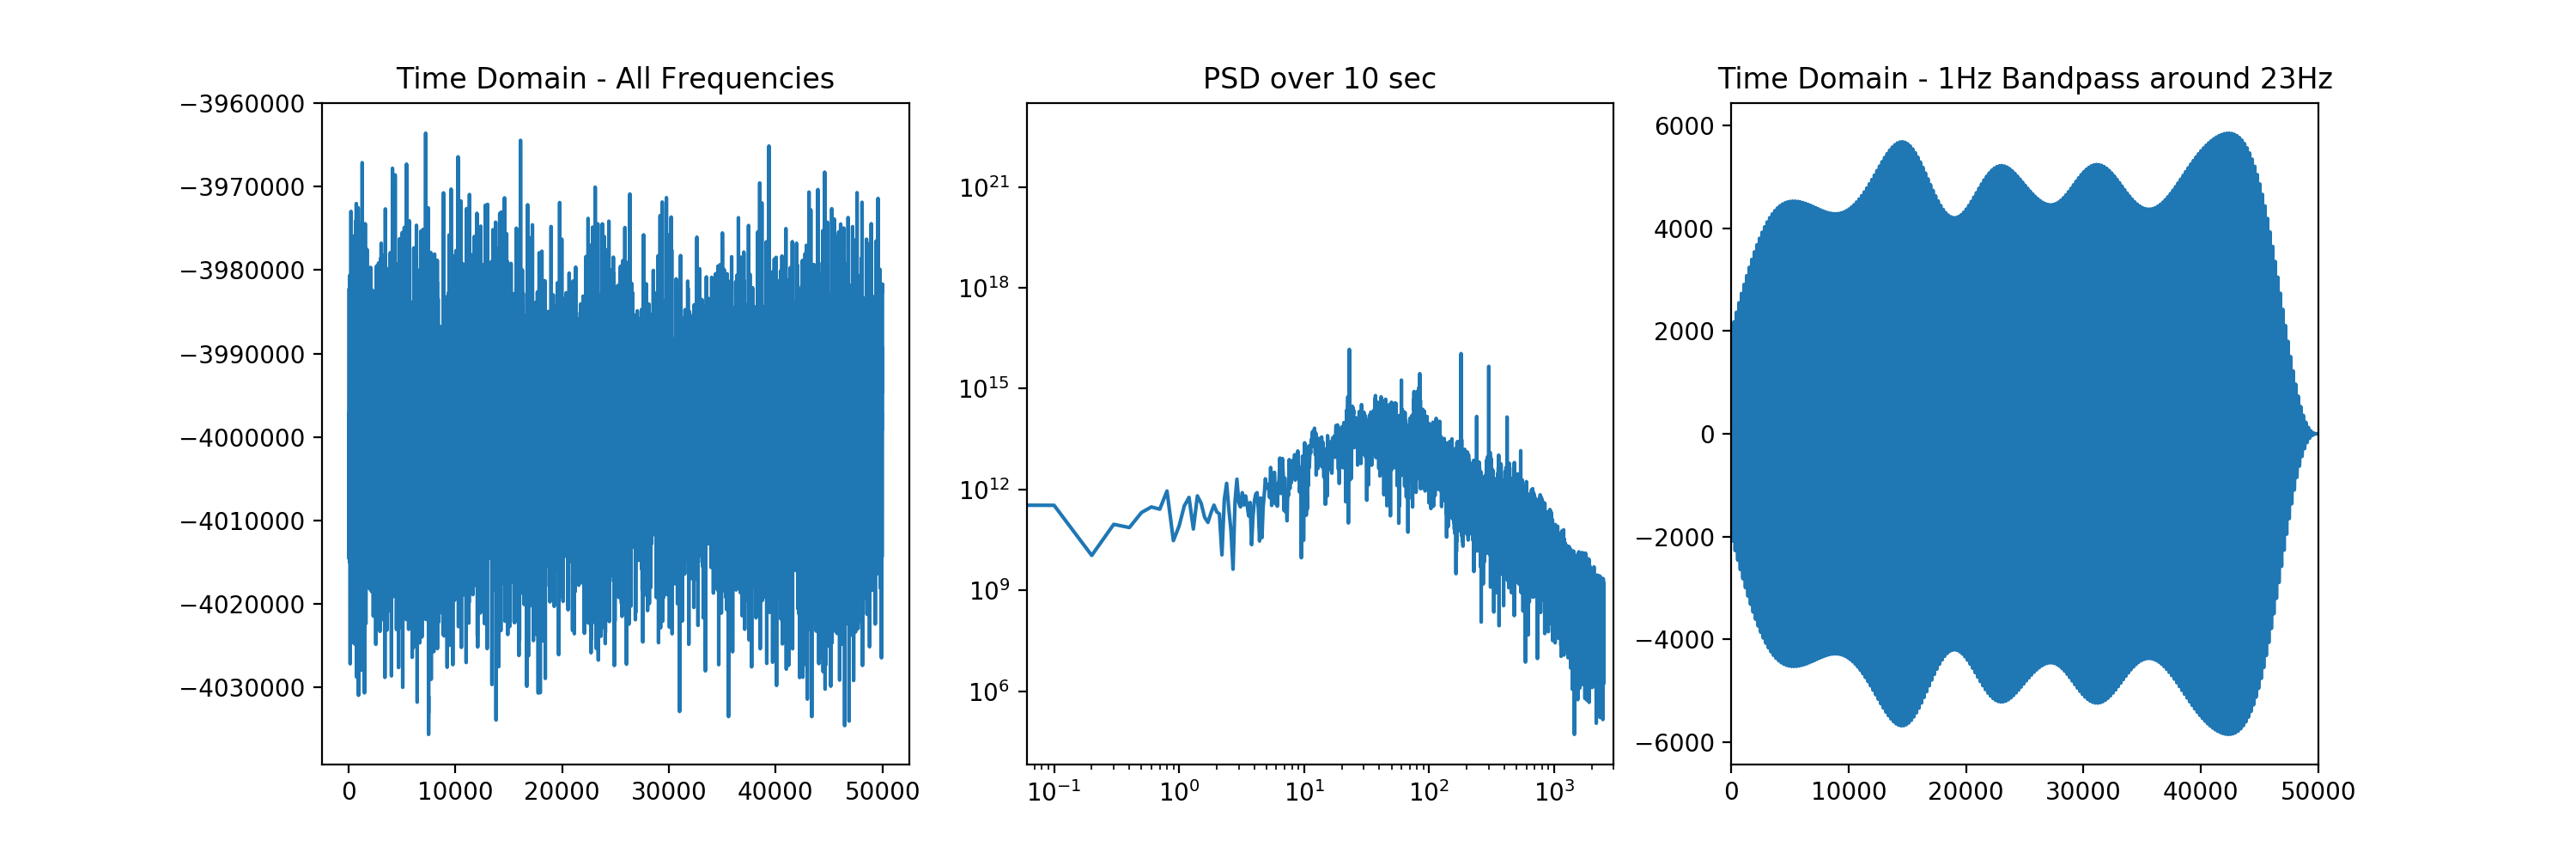

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


[(0, 50000)]

In [696]:
_,ax = plt.subplots(1,3,figsize=(15,5))
ax[1].loglog(freq,psd)
ax[1].set(xlim=(0,3000))
ax[1].set_title('PSD over 10 sec')
ax[0].set_title('Time Domain - All Frequencies')
ax[2].plot(range(50000),peak_response)
ax[0].plot(range(50000),bd_4.z2)
ax[2].set_title('Time Domain - 1Hz Bandpass around 23Hz')
ax[2].set(xlim =(0,50000))

In [ ]:
driven_data = bd_4.x2[:25000]
relaxation_data = bd_4.x2[25000:]
driven_psd = np.abs(np.fft.rfft(driven_data))**2
relaxation_psd = np.abs(np.fft.rfft(relaxation_data))**2
driven_freq = np.fft.rfftfreq(len(driven_data),d = 1/bd_4.fsamp)
relaxation_freq = np.fft.rfftfreq(len(relaxation_data), d = 1/bd_4.fsamp)

In [ ]:
_,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].loglog(driven_freq, driven_psd)
ax[1].loglog(relaxation_freq, relaxation_psd)
#ax[1].set(xlim = (75,250))
#ax[0].set(xlim = (75,250))

# Short Time Fourier Transform

In [683]:
f, t, Zxx = signal.stft(bd_4.x2, fs = 5000, nperseg =900, window = 'hann')

<IPython.core.display.Javascript object>


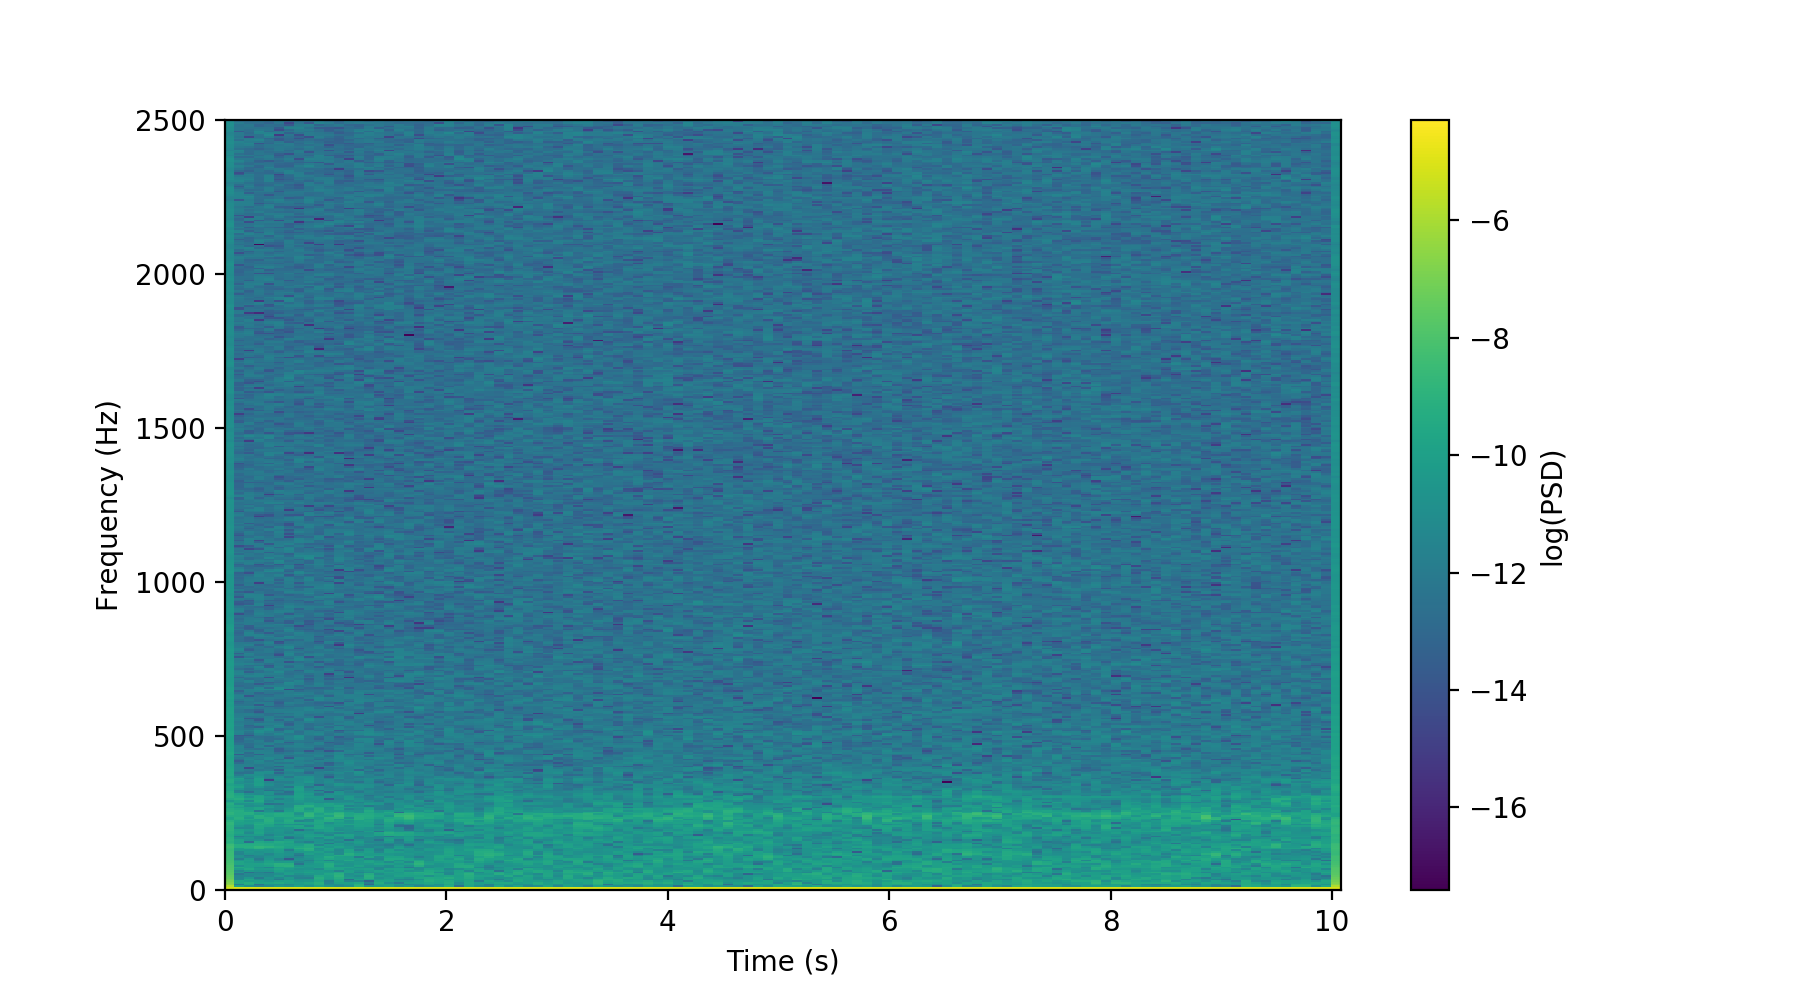

In [684]:
fig,ax = plt.subplots(figsize= (9,5))
mesh = ax.pcolormesh(t,f,np.log(np.abs(Zxx)))
ax.set(ylim = (0,2500),ylabel = 'Frequency (Hz)', xlabel = 'Time (s)', yscale = 'linear')
fig.colorbar(mesh, label = 'log(PSD)')